## HW3
We will classify the Fashion MNIST images (https://github.com/zalandoresearch/fashion-mnist).
Within in that page, there are links for the gzipped train and test files.

1. Write fetch_fashionmnist_data(). You'll need to use urllib and unzip the data. 
2. Use mnist_reader() function from that webpage to load data. Plot the first 100 images with 10 images per row similar to what we did with MNIST.

We will use the first 1000 examples as training and the next 1000 examples for testing to save time.  

3. Use SVC(gamma="auto"...) and report the 3-fold cross-validation scores.
4. Use SVC(gamma="auto"...) and perform 3-fold cross-validation prediction, and plot the confusion matrix as an image. 

Don't forget to add comments!

# Setup

Copying imports from class

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(0)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 1. Write fetch_fashionmnist_data(). You'll need to use urllib and unzip the data.
I wasn't sure what to do, I know the instructions seem straighforward but I got a bit stuck tryin to understand what was being asked. I decided to try and make the function using stuff from class 2 and the function definition of mnist_reader(), this is what I got

In [2]:
import gzip
import urllib.request

IMAGES_PATH = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz"
LABELS_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz"
LOCAL_PATH = "data"

def fetch_and_read_fashiomnist(images_url=IMAGES_PATH, labels_url=LABELS_URL, local_path=LOCAL_PATH):
    if not os.path.isdir(local_path):
        os.makedirs(local_path)
    labels_path = os.path.join(local_path, "labels.gz")
    images_path = os.path.join(local_path, "images.gz")
    urllib.request.urlretrieve(labels_url, labels_path)
    urllib.request.urlretrieve(images_url, images_path)
    
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
data, labels= fetch_and_read_fashiomnist()

Just making sure here it worked... and it did!

In [4]:
print(data.shape)
print(labels.shape)
print(labels[0:3])

(60000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(60000,)
[9 0 0]


## 2. Plot the first 100 images with 10 images per row similar to what we did with MNIST.
Let's start by copying some of the code and remember what it does (it should be pretty much the same I think)

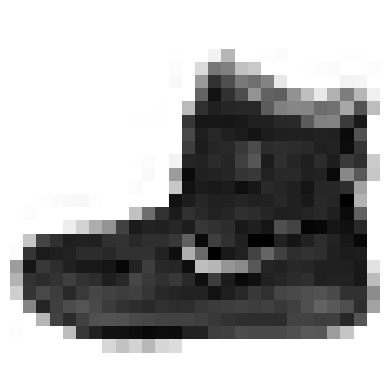

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = data[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

That looks like a shoe, so it seems like it worked. Let me try now with the code for multiple digits and do any needed changes

In [6]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1 

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

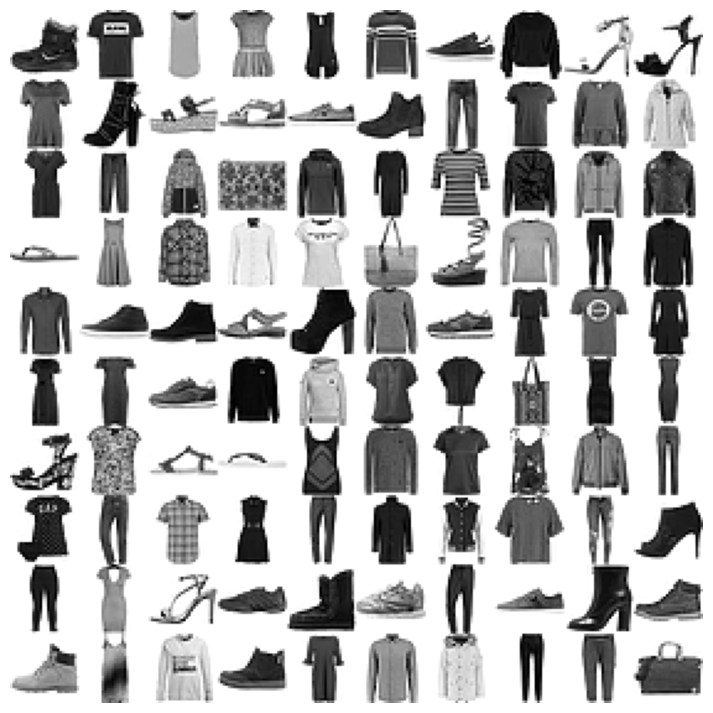

In [7]:
plt.figure(figsize=(9,9))
example_images = data[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

making a little hash table because I have a hard time doing it in my head

In [8]:
diccionario={
0:   "T-shirt/top",
1:	"Trouser",
2:	"Pullover",
3:	"Dress",
4:	"Coat",
5:	"Sandal",
6:	"Shirt",
7:	"Sneaker",
8:	"Bag",
9:	"Ankle boot",
}

def trans(keys):
    if isinstance(keys,int):
        return diccionario[keys]
    
    return [diccionario[key] for key in keys]

In [9]:
print(labels[0:10])
print(trans(labels[0:10]))

[9 0 0 3 0 2 7 2 5 5]
['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


Pretty much no changes, but I read the code for the function, not sure about the axis combining part but since it worked I'm not going to worry about it until the day it doesn't comes

## 3. Use SVC(gamma="auto"...) and report the 3-fold cross-validation scores.
So now let's split the data into the first and second thousand

In [33]:
X_train, X_test, y_train, y_test = data[0:1000], data[1000:2000], labels[0:1000], labels[1000:2000]

And now use the multiclass clasification using the Support Vector Machine module from sklearn, I'm guessing we will keep using the 42 random seed. let's try to predict the first row (We use the default OvO behaviour of SVC)

In [11]:
from sklearn.svm import SVC

svc_clf = SVC(gamma="auto", random_state=0, kernel="linear")
svc_clf.fit(X_train, y_train)

predicted=svc_clf.predict(X_train[0:10])
print(predicted)
print(trans(predicted))

[9 0 0 3 0 2 7 2 5 5]
['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


Now let's do some cross validation

In [12]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(svc_clf, X_train, y_train, cv=3, scoring="accuracy"))


[0.79341317 0.8018018  0.8018018 ]


That looks awfully bad XD, 11% is as bad as a naive estimator. let's see how it does predicting. 

**Edit:** Using the linear SVM we get better results without changing the gamma parameter.

## 4. Use SVC(gamma="auto"...) and perform 3-fold cross-validation prediction, and plot the confusion matrix as an image. 

Let's do the confusion matrix using the 3-fold cross-val-predict function (since that's what I think the question is asking? the cross validation results should be the same since we fixed the random seed) of the train set.

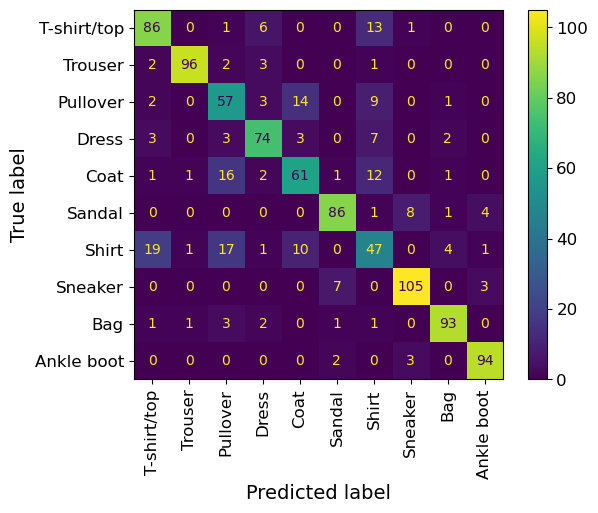

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = cross_val_predict(svc_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_mx, 
#    display_labels=svc_clf.classes_, 
    display_labels=list(diccionario.values())
    )
disp.plot(xticks_rotation="vertical")
plt.show()


That's a lot better than before the linear kernel. It also makes sense that there is confusion between T-shirts with shirts and coats.

I never used the test set so maybe lets do the confusion matrix on the predictions of the test set just in case

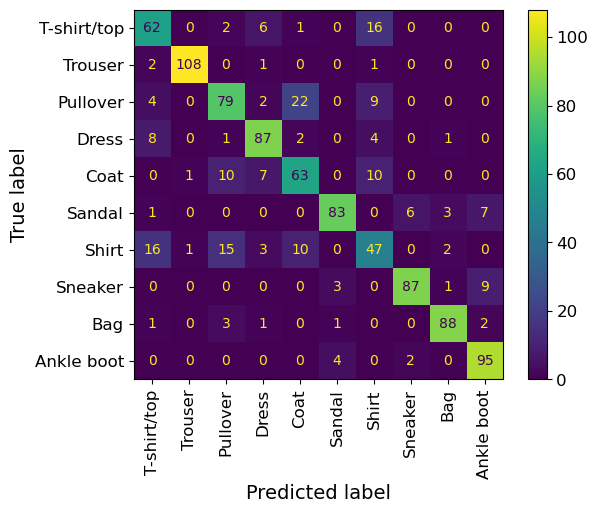

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = svc_clf.predict(X_test)
conf_mx = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_mx, 
#    display_labels=svc_clf.classes_, 
    display_labels=list(diccionario.values())
    )
disp.plot(xticks_rotation="vertical")
plt.show()
